# Analize Morgane Audrain PhD data

## Import

In [1]:
import numpy as np
import base64
import struct
from cobs import cobs
from collections import namedtuple
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from tqdm.notebook import tqdm
import scipy.signal
import scipy.io
import rawpy
import imageio
import time
import os

## Code to import VSI Images

In [3]:
#mat = scipy.io.loadmat('vsdi_image.mat')

In [4]:
#Vsdi=mat['vsdi_image2']

## Code to import behavioral data

In [6]:
#name_animal= 'a4_Po_412652'
Path ='/home/melisamc/Documentos/photon2_testing/logfiles_decoded/'
Files='20220513-165536_677_decoded.mat'
date='20211216'
data=os.path.join(Path, Files)
packet = scipy.io.loadmat(data)

In [7]:
analog=packet['analog']
states=packet['longVar']
digitalIn=packet['digitalIn']
digitalOut=packet['digitalOut']
long=packet['packetNums']
num_packet=len(long[0])
time=num_packet/1000/60

### Figure

<div class="alert alert-block alert-info">
<b>Info:</b> Plotting all the data (Visualization purpose)
</div>

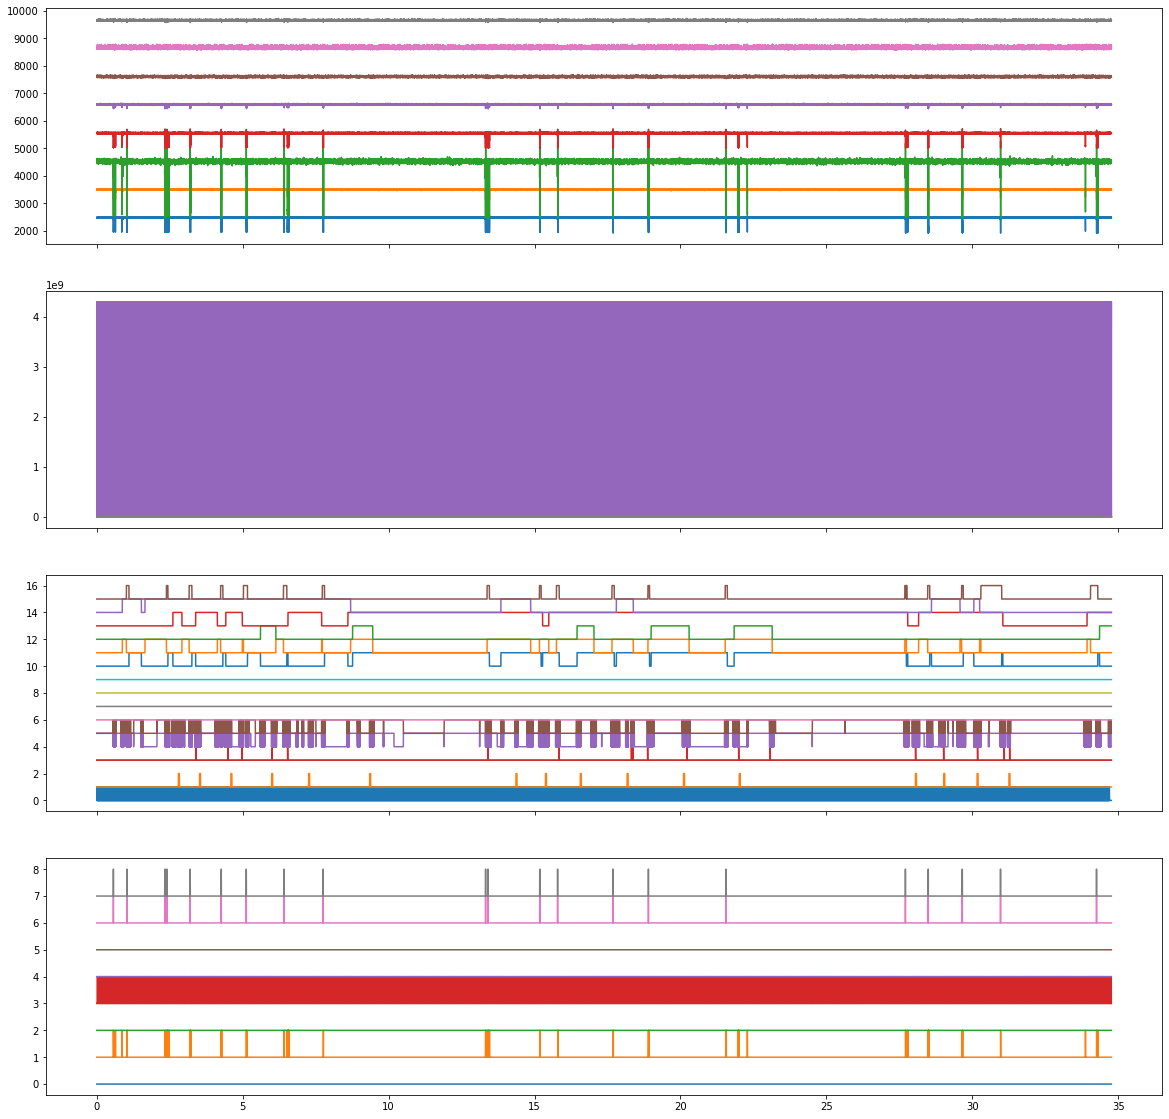

In [8]:
fig, ax = plt.subplots(4, figsize=(20, 20), sharex=True)
t = np.linspace(0,time,num_packet)
for n in range(8):
    ax[0].plot(t,analog[:, n]+n*1024)
    ax[1].plot(t,states[:, n])
    ax[3].plot(t,digitalOut[:, n]+n)

for n in range(16):
    ax[2].plot(t,digitalIn[:, n]+n)

#### Plot the Trial trigger with Start Trial trigger and Finish Trial trigger to check the match

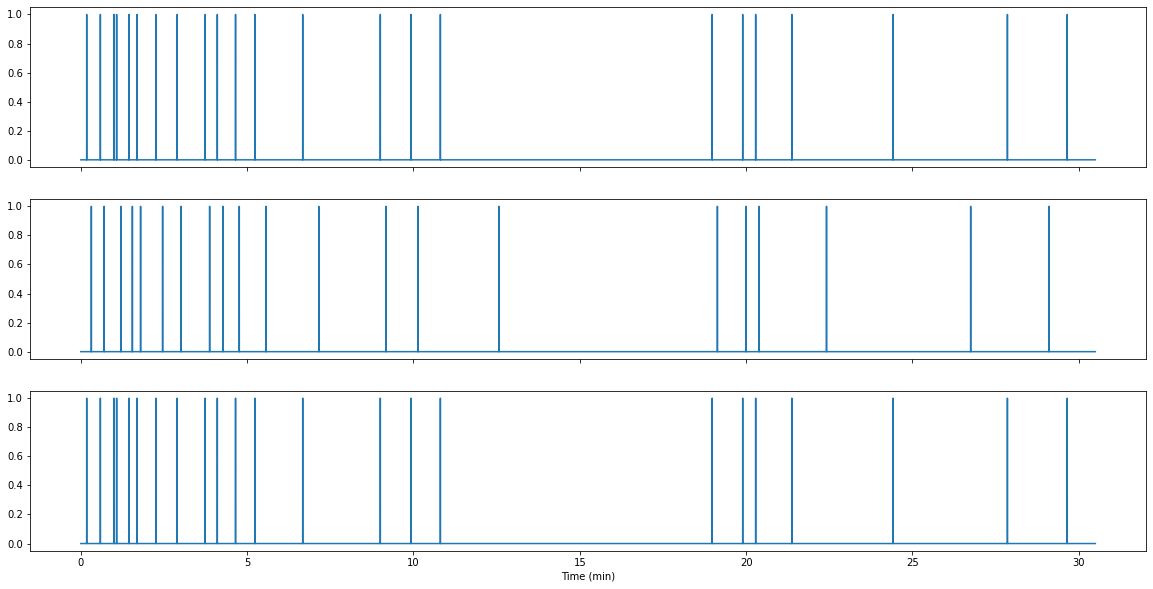

In [24]:
#Figure 1: Trial trigger with Start Trial trigger
#Figure 2: Trial trigger with Finish Trial trigger
#Figure 3: Trial trigger with Start Trial trigger and Finish Trial trigger
t = np.linspace(0,time,num_packet)
fig, ax = plt.subplots(3,figsize=(20, 10), sharex=True)
plt.xlabel('Time (min)')
#figure 1
#ax[0].plot(t,digitalIn[:,13])
ax[0].plot(t, digitalIn[:, 0])
# Figure 2
ax[1].plot(t, (digitalIn[:,1]))
#ax[1].plot(t, (digitalIn[:,13]))
#Figure 3
ax[2].plot(t, digitalIn[:, 0])
#ax[2].plot(t, (digitalIn[:,1]))
#ax[2].plot(t, (digitalIn[:,13]))

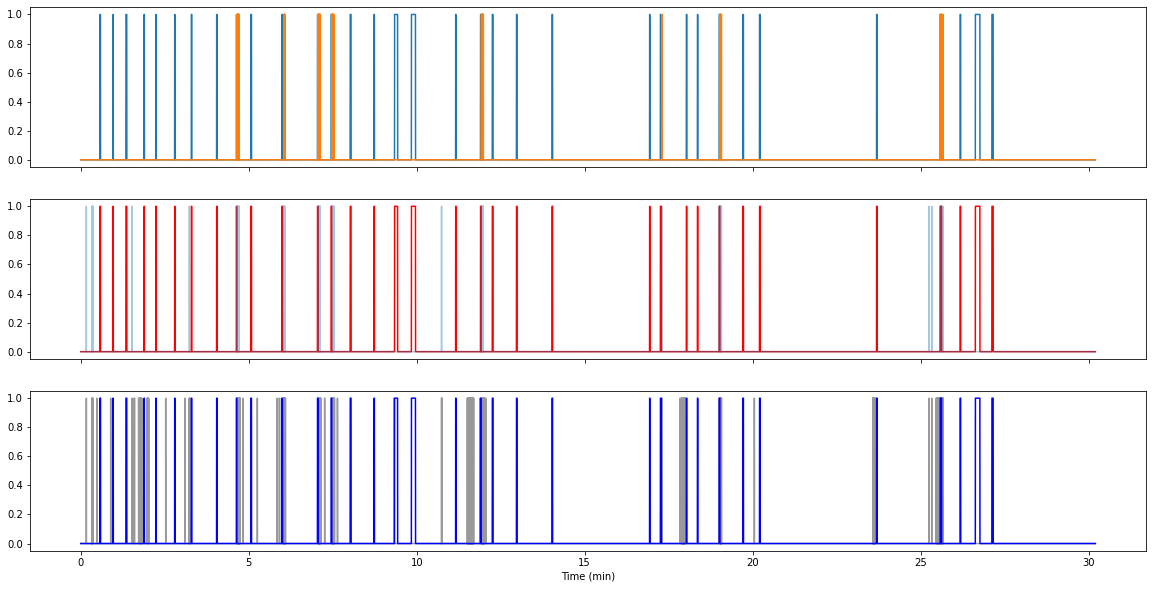

In [38]:
#Figure 1: Trial trigger with Start Trial trigger
#Figure 2: Trial trigger with Finish Trial trigger
#Figure 3: Trial trigger with Start Trial trigger and Finish Trial trigger
t = np.linspace(0,time,num_packet)
fig, ax = plt.subplots(3,figsize=(20, 10), sharex=True)
plt.xlabel('Time (min)')
#figure 1
ax[0].plot(t,digitalIn[:,15])
ax[0].plot(t, digitalIn[:, 12])
# Figure 2
ax[1].plot(t, (digitalIn[:,15]),'r')
ax[1].plot(t, (digitalOut[:,6]), alpha=0.4)
#Figure 3
#ax[2].plot(t, digitalIn[:, 0])
ax[2].plot(t, (states[:,4]),'k',alpha=0.4)
ax[2].plot(t, (digitalIn[:,15]),'b')
plt.savefig(name_animal+'_'+date+'_accuracy.png')

#### All session before separation in trials 

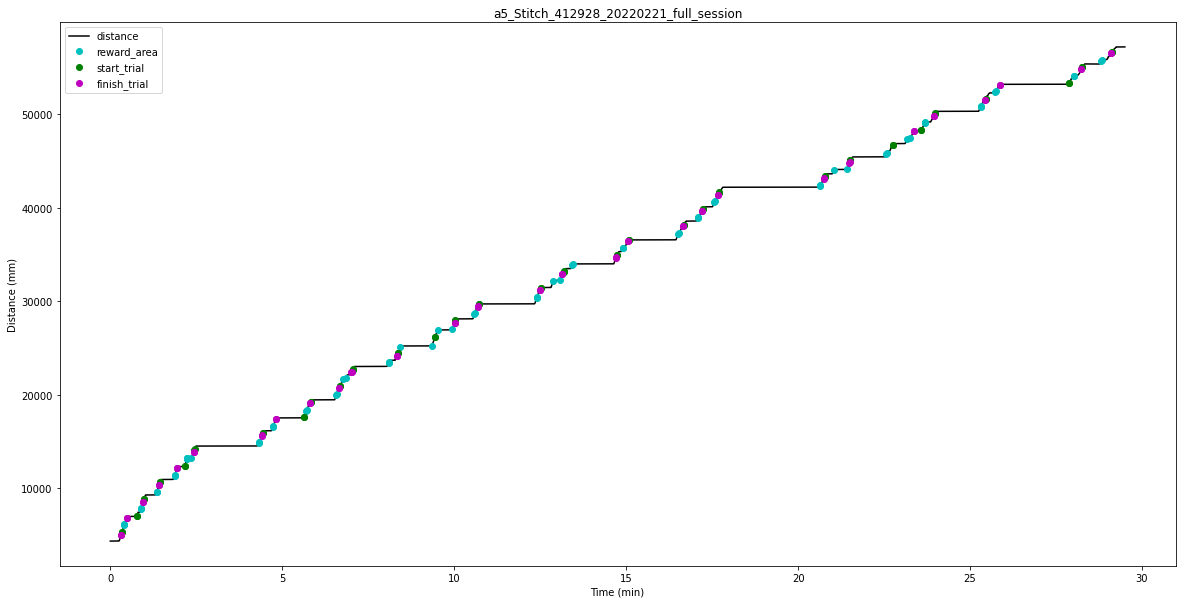

In [4]:
# full session
#Legend: cyan dots -> Reward Area, green dots -> Start Trial,  magenta dots -> Finish Trial, black line -> distance 
f=states[:,1]
s=digitalIn[:,1]
fi=digitalIn[:,0]
g=digitalIn[:,15]
plt.subplots(figsize=(20, 10))
idx = np.argwhere(np.diff(np.sign(g))).flatten()
idx3 = np.argwhere(np.diff(np.sign(s))).flatten()
idx4 = np.argwhere(np.diff(np.sign(fi))).flatten()
t = np.linspace(0,time,num_packet)
plt.plot(t,f[:], 'k', label="distance")
plt.plot(t[idx],f[idx],'co',label="reward_area")
plt.plot(t[idx3],f[idx3],'go',label="start_trial")
plt.plot(t[idx4],f[idx4],'mo',label="finish_trial")
plt.xlabel('Time (min)')
plt.ylabel('Distance (mm)')
plt.legend(loc="upper left")
plt.title(name_animal+'_'+date +'_full_session')
plt.savefig(name_animal+'_'+date+'_full_session.png')

#### Calculate the speed for the session

In [83]:
# Calculate speed in cm/s
speed=[]
time_s=long[0]/1000
for i in range(1, num_packet):
    speed_c=(states[i,1]-states[i-1,1])/0.001
    speed.append(speed_c)

<ipython-input-83-7dad0c721582>:5: RuntimeWarning: overflow encountered in uint_scalars
  speed_c=(states[i,1]-states[i-1,1])/0.001


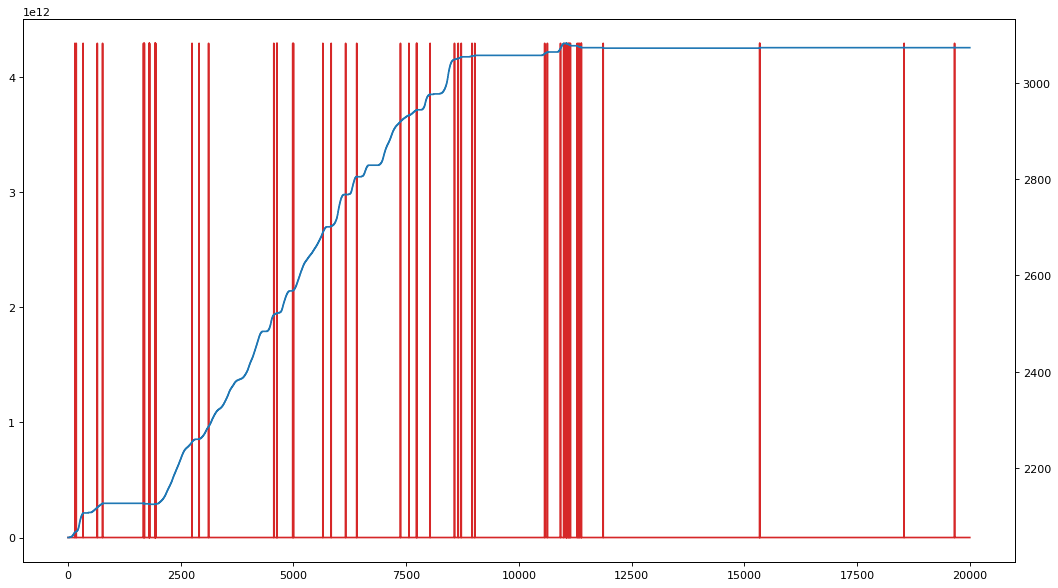

In [84]:
# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(speed[30000:50000], color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(states[30000:50000,1], color='tab:blue')

#### Trials per Trials analysis

In [5]:
# Calculate timestamps for start and finish of a trial 
Timestamp1=[]
Timestamp2=[]
distance=states[:,1]
start_trial =digitalIn[:,1]
finish_trial =digitalIn[:,0]
bin1 = np.where(start_trial==1)
bin2 = np.where(finish_trial==1)
for i in range(0,len(bin1[0])):
    Timestamp1.append(bin1[0][i])
for i in range(0,len(bin2[0])):
    Timestamp2.append(bin2[0][i])

lick and reward area per trial without tunnel 

In [ ]:
#Plotting lick on every trial 
#Legend: cyan dots -> Reward Area, green dots -> Start Trial,  magenta dots -> Finish Trial, red line -> distance
plt.subplots(figsize=(20, 10))
for i in range(1,len(Timestamp2)):
    f=states[Timestamp1[i-1]:Timestamp2[i],1]
    l=states[Timestamp1[i-1]:Timestamp2[i],4]
    g=digitalIn[Timestamp1[i-1]:Timestamp2[i],15]
    idx = np.argwhere(np.diff(np.sign(g))).flatten()
    idx2 = np.argwhere(np.diff(np.sign(l))).flatten()
    t = np.arange(Timestamp1[i-1],Timestamp2[i])
    plt.plot(t,f, 'k')
    plt.plot(t,g*60000,'m--')
    plt.plot(t[idx2],f[idx2],'bo')
    plt.plot(t,digitalIn[Timestamp1[i-1]:Timestamp2[i],14]*60000,'c--')
    #plt.legend()
    #plt.xlabel('Time (min)')
    plt.ylabel('Distance (mm)')
    plt.title(name_animal+'_'+date +'_Trials')
plt.savefig(name_animal+'_'+date+'_Trials.png')

IndexError: list index out of range

Reward and lick per trials 

In [ ]:
plt.subplots(figsize=(20, 10))
for i in range(1,len(Timestamp1)):
    f=states[Timestamp1[i-1]:Timestamp2[i],1]
    l=states[Timestamp1[i-1]:Timestamp2[i],4]
    g=digitalIn[Timestamp1[i-1]:Timestamp2[i],12]
    idx = np.argwhere(np.diff(np.sign(g))).flatten()
    idx2 = np.argwhere(np.diff(np.sign(l))).flatten()
    t = np.arange(Timestamp1[i-1],Timestamp2[i])
    plt.plot(t,f, 'k', label='distance' )
    plt.plot(t,g*60000,'--',)
    plt.plot(t[idx2],f[idx2],'bo')
    plt.plot(t,digitalIn[Timestamp1[i-1]:Timestamp2[i],15]*60000,'c--' )
    plt.plot(t,digitalOut[Timestamp1[i-1]:Timestamp2[i],6]*60000,'g--' )
    #plt.xlabel('Time (min)')
    plt.ylabel('Distance (mm)')
    plt.title(name_animal+'_'+date +'_Trials_Reward_licks')
plt.savefig(name_animal+'_'+date+'_Trials_Reward_licks.png')

#### Reward Area per Trials 

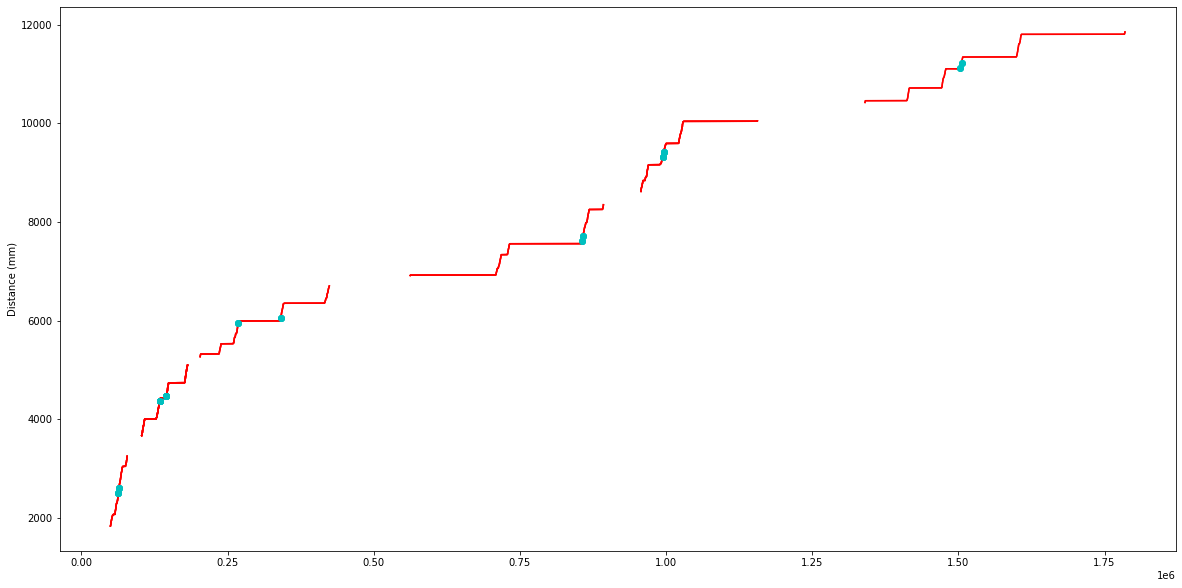

In [54]:
plt.subplots(figsize=(20, 10))
for i in range(1,len(Timestamp1)):
    f=states[Timestamp1[i-1]:Timestamp2[i],1]
    l=states[Timestamp1[i-1]:Timestamp2[i],4]
    g=digitalIn[Timestamp1[i-1]:Timestamp2[i],15]
    idx = np.argwhere(np.diff(np.sign(g))).flatten()
    idx2 = np.argwhere(np.diff(np.sign(l))).flatten()
    t = np.arange(Timestamp1[i-1],Timestamp2[i])
    plt.plot(t,f, 'r')
    plt.plot(t[idx],f[idx],'co')
    plt.ylabel('Distance (mm)')
plt.savefig(name_animal+'_'+date+'_Trials_Reward.png')

Tunnel and licks

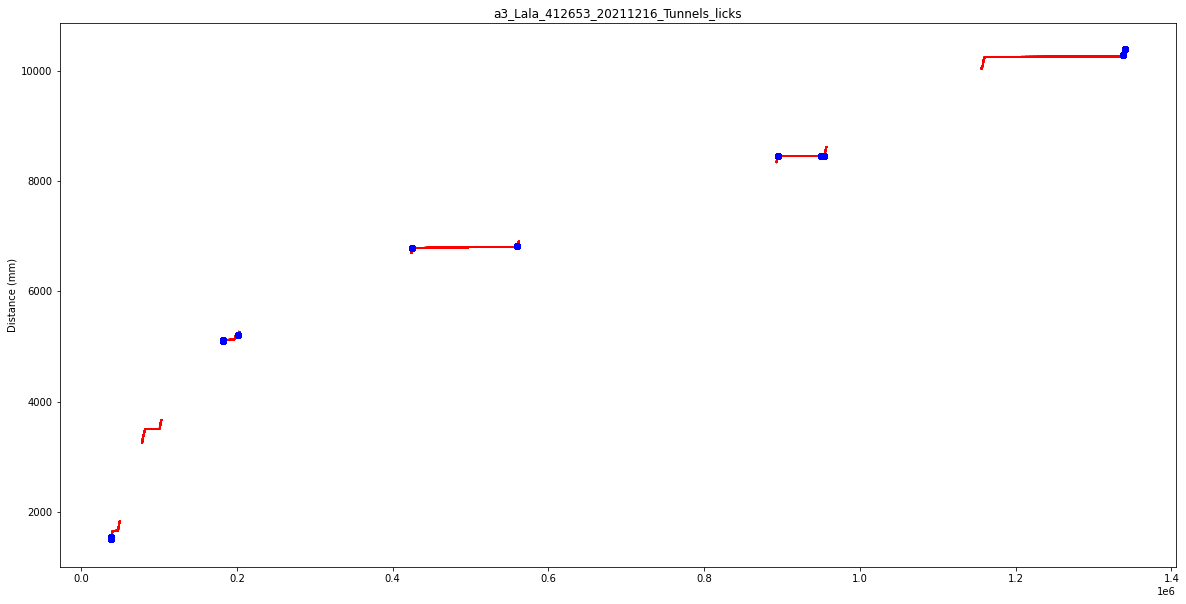

In [55]:
plt.subplots(figsize=(20, 10))
for i in range(1,len(Timestamp1)):
    f=states[Timestamp2[i-1]:Timestamp1[i],1]
    l=states[Timestamp2[i-1]:Timestamp1[i],4]
    idx2 = np.argwhere(np.diff(np.sign(l))).flatten()
    t = np.arange(Timestamp2[i-1],Timestamp1[i])
    plt.plot(t,f, 'r')
    plt.plot(t[idx2],f[idx2],'bo')
    plt.ylabel('Distance (mm)')
    plt.title(name_animal+'_'+date +'_Tunnels_licks')
plt.savefig(name_animal+'_'+date+'_Tunnels_licks.png')

##### Tunnels and Trials 

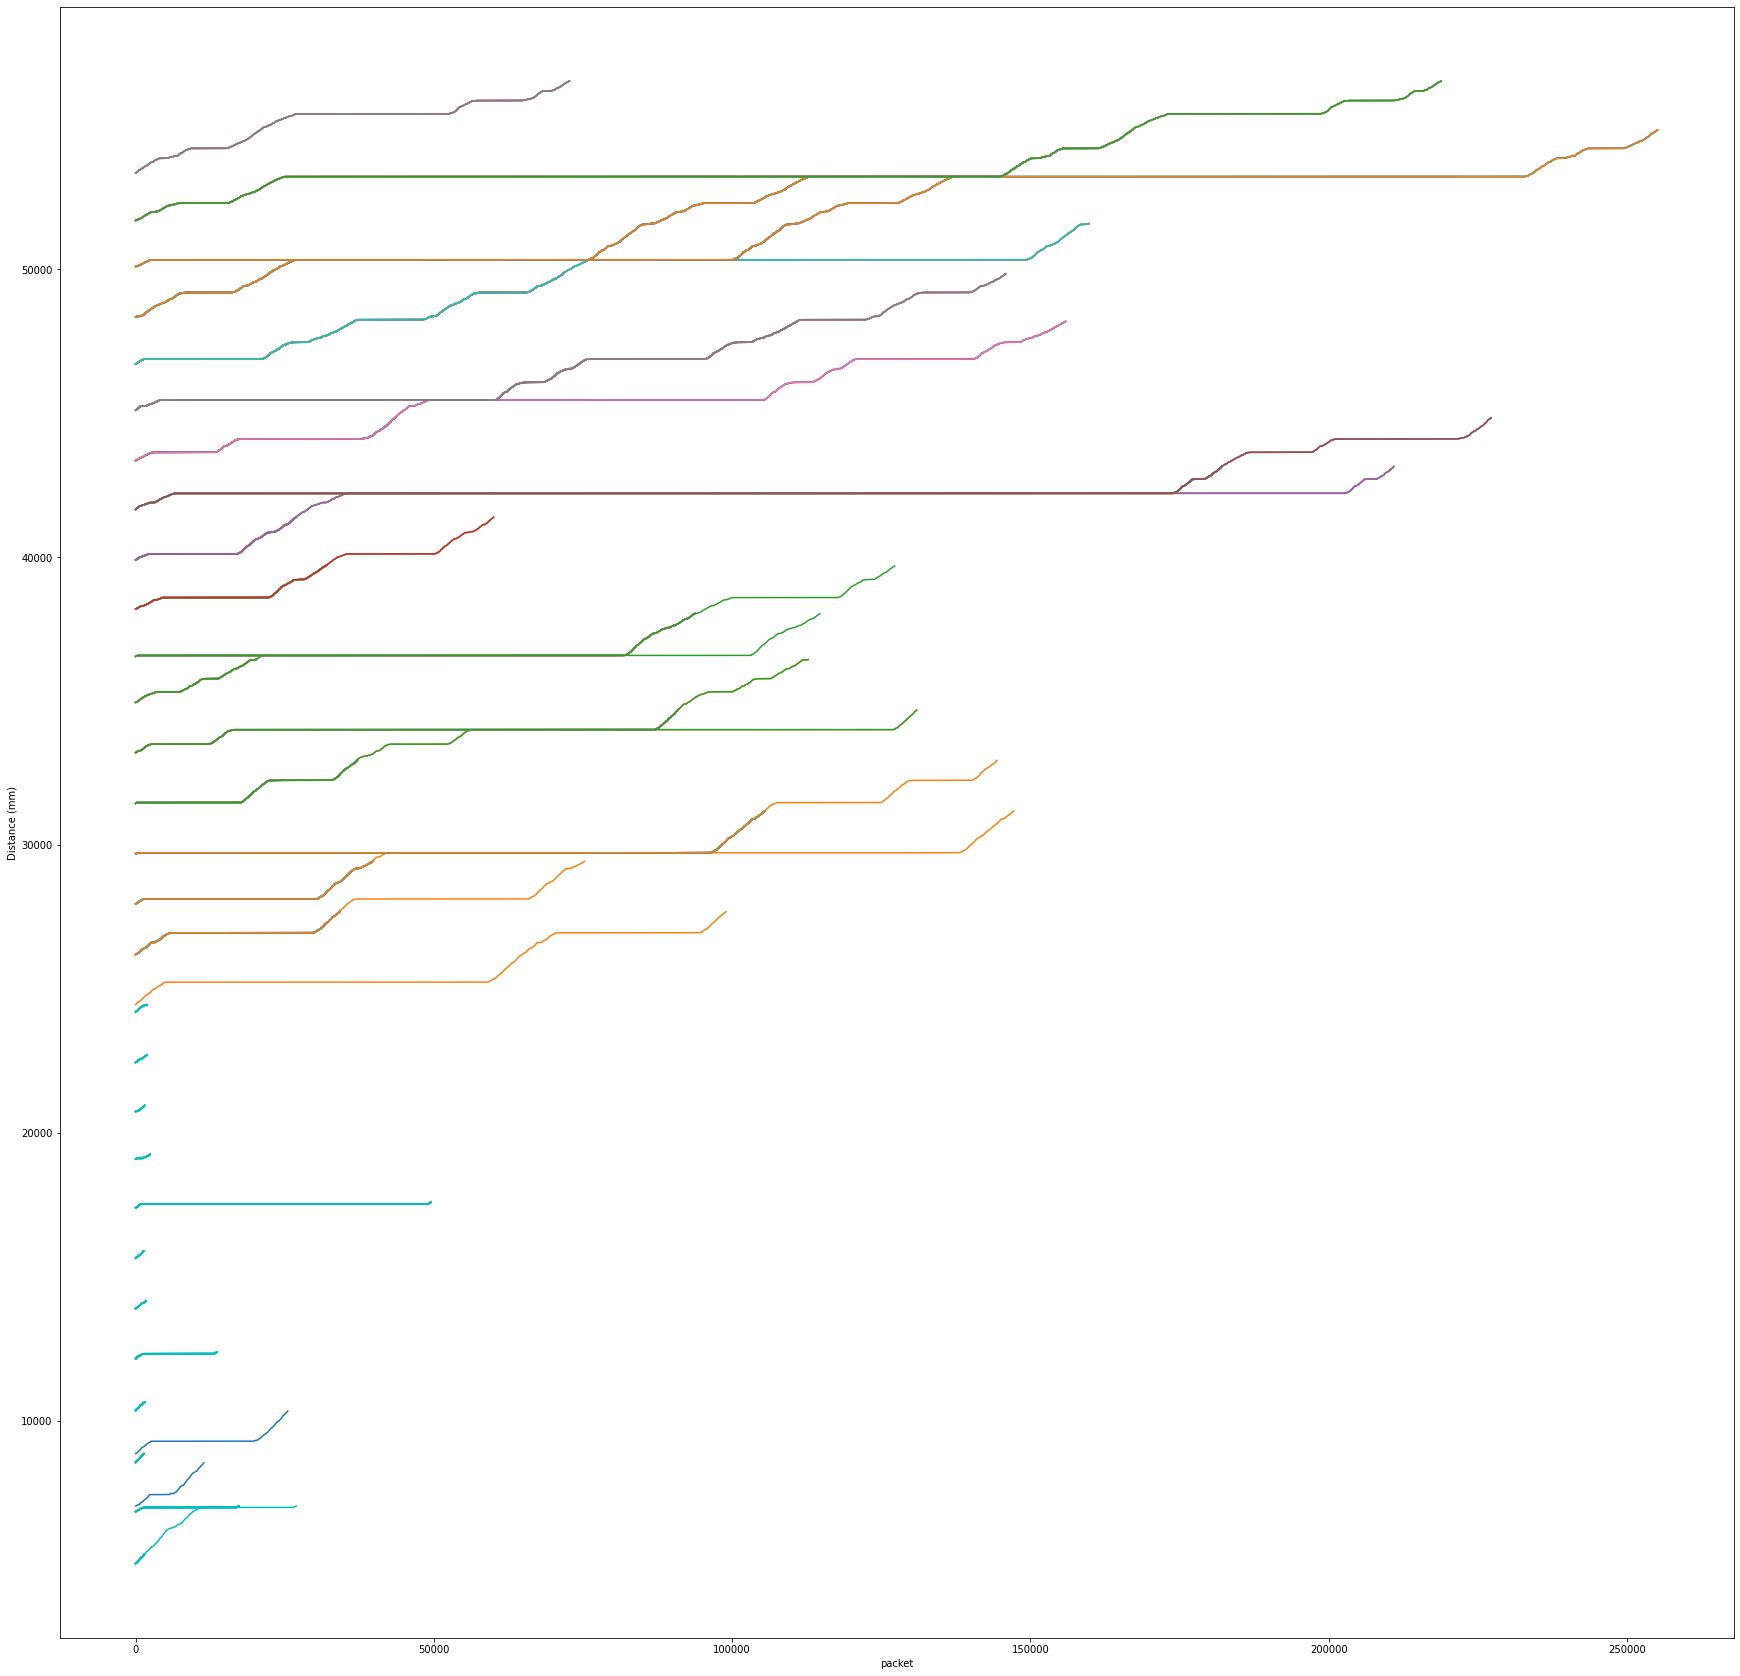

In [6]:
plt.subplots(figsize=(30, 30))
t = np.linspace(0,time,num_packet)
for i in range(1,len(Timestamp2),10):
    Trial=states[Timestamp1[i-1]:Timestamp2[i],1]
    Tunnel=states[Timestamp2[i-1]:Timestamp1[i],1]
    Reward_area=states[:,4]
    plt.ylabel('Distance (mm)')
    plt.xlabel('packet')
    plt.plot(Trial)
    #plt.plot(distance)
    plt.plot(Tunnel,'c')
plt.savefig(name_animal+'_'+date+'_Tunnels_Trials.png')

### Example of trials 

#### Trials False

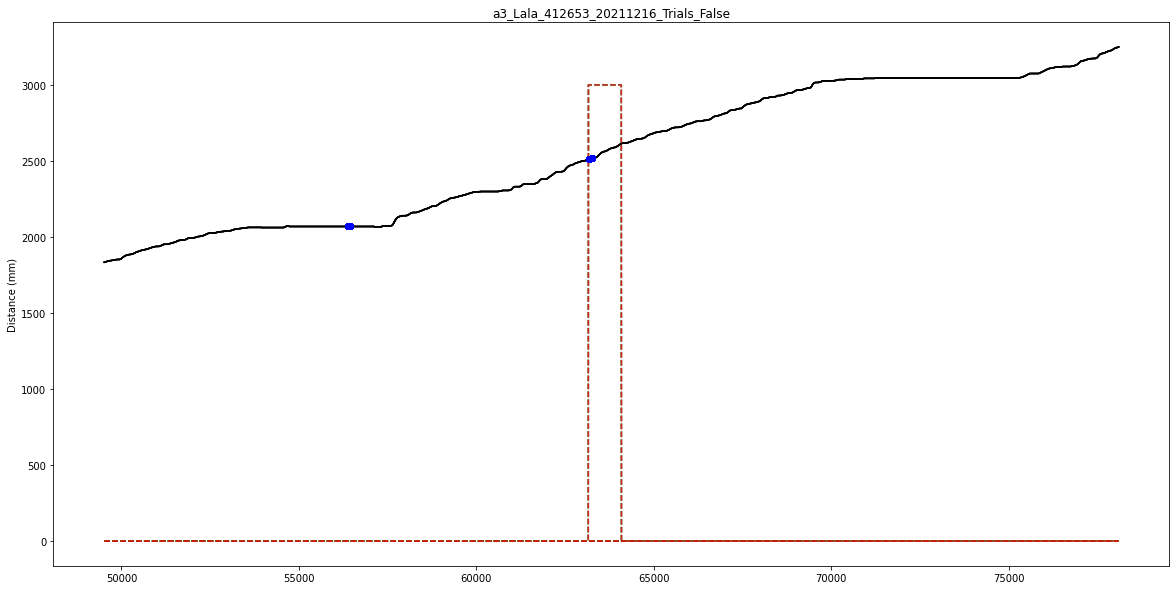

In [57]:
plt.subplots(figsize=(20, 10))
for i in range(100,200):
    f=states[Timestamp1[i-1]:Timestamp2[i],1]
    l=states[Timestamp1[i-1]:Timestamp2[i],4]
    g=digitalIn[Timestamp1[i-1]:Timestamp2[i],15]
    r=digitalIn[Timestamp1[i-1]:Timestamp2[i],12]
    b=digitalIn[Timestamp1[i-1]:Timestamp2[i],14]
    idx = np.argwhere(np.diff(np.sign(g))).flatten()
    idx2 = np.argwhere(np.diff(np.sign(l))).flatten()
    t = np.arange(Timestamp1[i-1],Timestamp2[i])
    plt.plot(t,f,'k', label="distance")
    plt.plot(t,g*3000,'--', label="reward_area")
    plt.plot(t,r*3000,'c--', label="reward")
    plt.plot(t,b*3000,'g--', label="manual_reward")
    plt.plot(t,digitalOut[Timestamp1[i-1]:Timestamp2[i],7]*3000,'r--', label="manual_reward")
    plt.plot(t[idx2],f[idx2],'bo', label="lick")
    #plt.xlabel('Time (min)')
    plt.ylabel('Distance (mm)')
    plt.title(name_animal+'_'+date +'_Trials_False')
plt.savefig(name_animal+'_'+date+'_Trials_False.png')

#### Trials success + Lick tunnels 

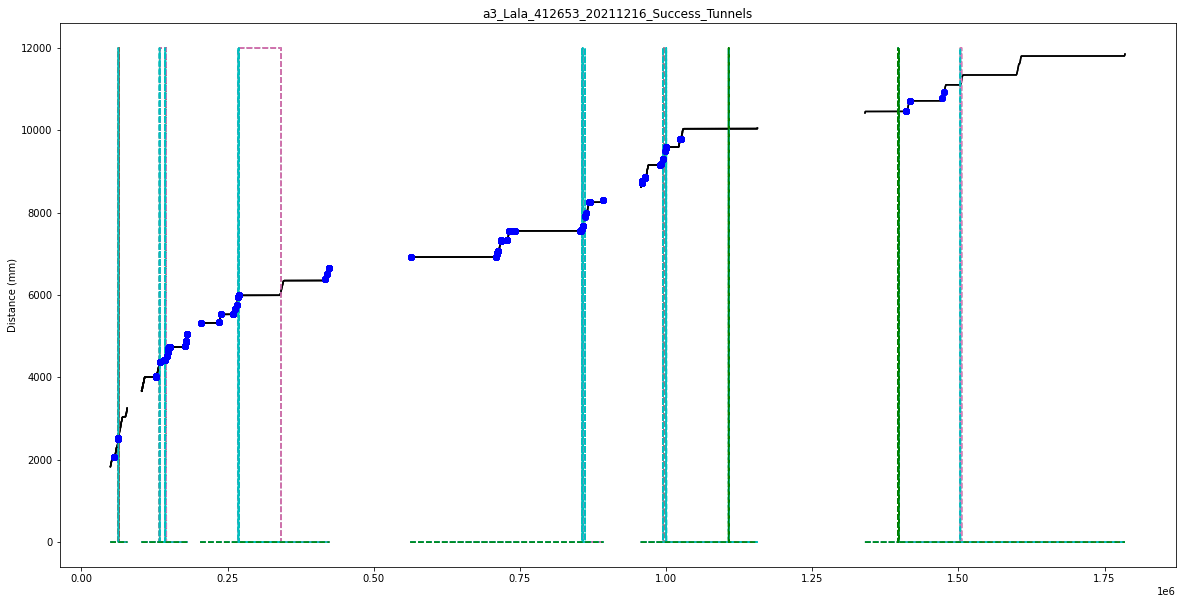

In [60]:
plt.subplots(figsize=(20, 10))
for i in range(0,len(Timestamp1)):
    f=states[Timestamp1[i-1]:Timestamp2[i],1]
    l=states[Timestamp1[i-1]:Timestamp2[i],4]
    g=digitalIn[Timestamp1[i-1]:Timestamp2[i],15]
    r=digitalIn[Timestamp1[i-1]:Timestamp2[i],12]
    b=digitalIn[Timestamp1[i-1]:Timestamp2[i],14]
    r2=digitalOut[Timestamp1[i-1]:Timestamp2[i],6]
    idx = np.argwhere(np.diff(np.sign(g))).flatten()
    idx2 = np.argwhere(np.diff(np.sign(l))).flatten()
    t = np.arange(Timestamp1[i-1],Timestamp2[i])
    plt.plot(t,f, 'k', label="distance")
    plt.plot(t,g*12000,'--')
    plt.plot(t,r*12000,'c--')
    plt.plot(t,r2*12000,'c--')
    plt.plot(t,b*12000,'g--')
    plt.plot(t[idx2],f[idx2],'bo')
    #plt.xlabel('Time (min)')
    plt.ylabel('Distance (mm)')
    plt.title(name_animal+'_'+date +'_Success_Tunnels')
plt.savefig(name_animal+'_'+date+'_Success_Tunnels.png')

#### Example lick only at reward zone and before 

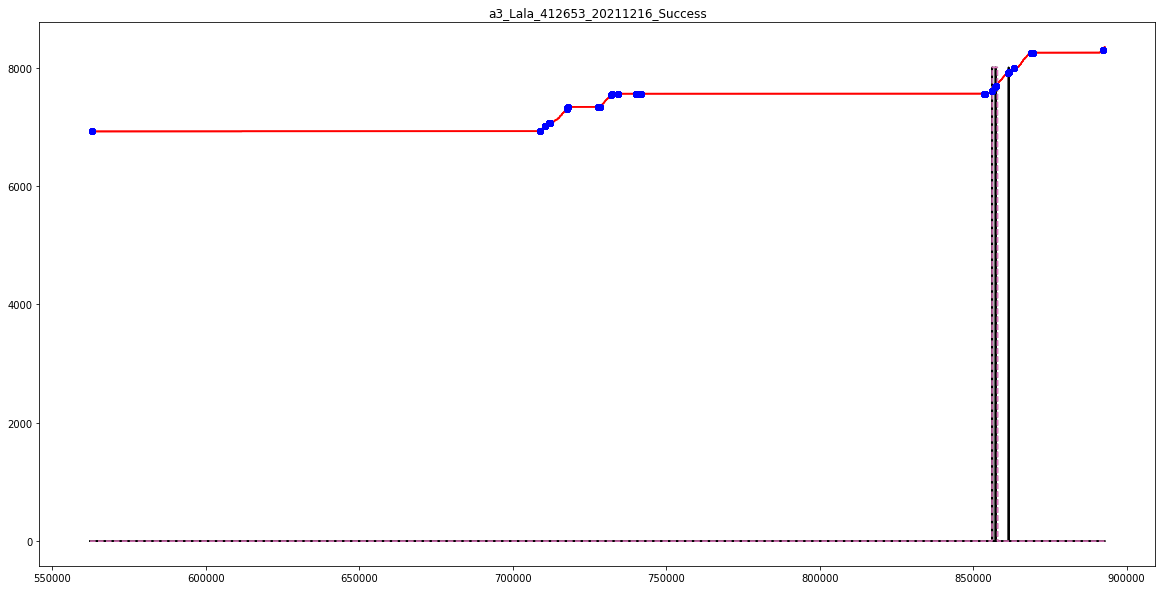

In [66]:
#Example trial True lick at tunnel 
#Plotting lick on every trial 
plt.subplots(figsize=(20, 10))
for i in range(400,500):
    f=states[Timestamp1[i-1]:Timestamp2[i],1]
    l=states[Timestamp1[i-1]:Timestamp2[i],4]
    g=digitalIn[Timestamp1[i-1]:Timestamp2[i],15]
    r=digitalOut[Timestamp1[i-1]:Timestamp2[i],6]
    idx = np.argwhere(np.diff(np.sign(g))).flatten()
    idx2 = np.argwhere(np.diff(np.sign(l))).flatten()
    t = np.arange(Timestamp1[i-1],Timestamp2[i])
    plt.plot(t,f, 'r')
    plt.plot(t,r*8000, 'k')
    plt.plot(t,g*8000,'--')
    plt.plot(t[idx2],f[idx2],'bo')
    #plt.xlabel('Time (min)')
    #plt.ylabel('Distance (mm)')
    plt.title(name_animal+'_'+date +'_Success')
plt.savefig(name_animal+'_'+date+'_Success.png')